In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapely
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')

df = df[df['YearStart'] == df['YearEnd']]
df = df[df['StratificationCategory1'] == 'Overall']
df = df[df['DataValueUnit'] == '%']
df = df[df['DataValueType'] == 'Crude Prevalence']
df = df.dropna(subset=['DataValue'])
#df.to_csv(r'C:\Users\MadiL\CS110 CodeBase\crude_prevalence_df.csv')

df['Question'].unique()


C:\Users\MadiL\AppData\Local\Temp\ipykernel_16960\3537156680.py:17: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')


array(['Arthritis among adults',
       'Severe joint pain among adults with arthritis',
       'Chronic obstructive pulmonary disease among adults',
       'Received health care provider counseling for physical activity among adults with arthritis',
       'Consumed vegetables less than one time daily among high school students',
       'Short sleep duration among high school students',
       'Work limitation due to arthritis among adults aged 18-64 years with arthritis',
       'Obesity among high school students',
       'Fair or poor self-rated health status among adults',
       'Quit attempts in the past year among adult current smokers',
       'Consumed regular soda at least one time daily among high school students',
       'Current tobacco use of any tobacco product among high school students',
       'Health insurance coverage after pregnancy among women with a recent live birth',
       'Depression among adults',
       'Binge drinking prevalence among high school students

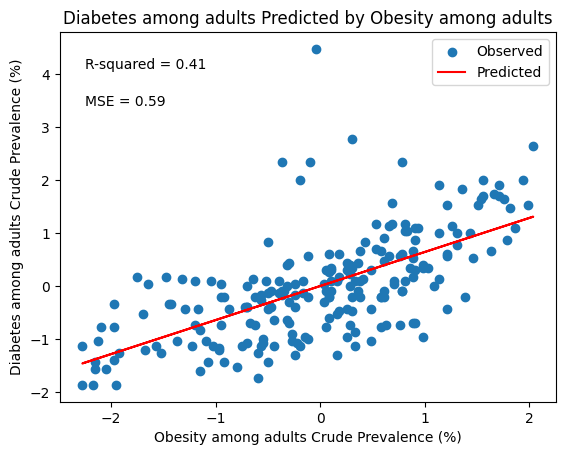

In [3]:
#df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\crude_prevalence_df.csv')

# Define x and y questions in an easy way so I can change them later 
x_question = 'Obesity among adults'
y_question = 'Diabetes among adults'


x_df = df[(df['Question'] == f'{x_question}')] #(df['YearStart'] == 2022)] #& (df['StratificationCategory1'] == 'Overall') & (df['DataValueUnit'] == '%') & (df['DataValueType'] == 'Crude Prevalence')]
y_df = df[(df['Question'] == f'{y_question}')] #(df['YearStart'] == 2022)] #& (df['StratificationCategory1'] == 'Overall') & (df['DataValueUnit'] == '%') & (df['DataValueType'] == 'Crude Prevalence')]

# Merge on 'LocationDesc'
merged_df = pd.merge(
    x_df[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    y_df[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    on=['LocationDesc', 'YearStart', 'YearEnd'],
    suffixes=('_x', '_y')
)
merged_df = merged_df.dropna(subset=['DataValue_x', 'DataValue_y'])

X = merged_df[['DataValue_x']]
y = merged_df['DataValue_y']

# Drop missing values in the variables

# Standardize the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Train a model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the predictions
plt.scatter(X, y, label='Observed')
plt.plot(X, predictions, label='Predicted', color='red')
plt.xlabel(f'{x_question} Crude Prevalence (%)')
plt.ylabel(f'{y_question} Crude Prevalence (%)')
plt.title(f'{y_question} Predicted by {x_question}')
plt.legend()

# Evaluate the model
mse = mean_squared_error(y, predictions)
plt.text(0.05, 0.8, f'MSE = {mse:.2f}', transform=plt.gca().transAxes)
r2 = r2_score(y, predictions)
plt.text(0.05, 0.9, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes)
plt.show()

  LocationDesc  YearStart  YearEnd  DataValue_x  DataValue_y
0      Arizona       2019     2019         21.9         19.0
1      Alabama       2019     2019         25.4         22.7
2       Alaska       2019     2019         17.7         15.5
3   California       2019     2019         19.6         18.2
4      Georgia       2019     2019         22.3         20.0


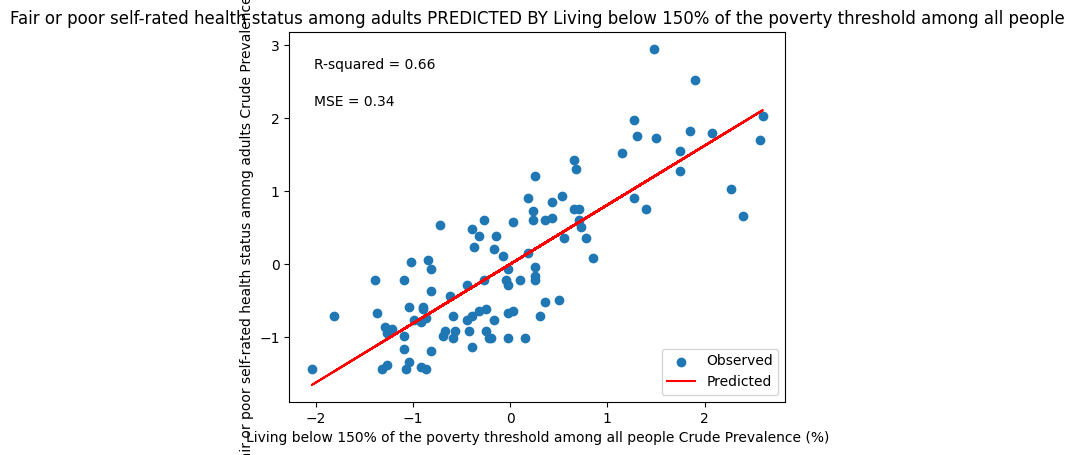

In [17]:
df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\crude_prevalence_df.csv')

x_question = r'Living below 150% of the poverty threshold among all people'
y_question = 'Fair or poor self-rated health status among adults'


x_df = df[(df['Question'] == f'{x_question}')] #(df['YearStart'] == 2022)] #& (df['StratificationCategory1'] == 'Overall') & (df['DataValueUnit'] == '%') & (df['DataValueType'] == 'Crude Prevalence')]
y_df = df[(df['Question'] == f'{y_question}')] #(df['YearStart'] == 2022)] #& (df['StratificationCategory1'] == 'Overall') & (df['DataValueUnit'] == '%') & (df['DataValueType'] == 'Crude Prevalence')]

# Merge on 'LocationDesc'
merged_df = pd.merge(
    x_df[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    y_df[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    on=['LocationDesc', 'YearStart', 'YearEnd'],
    suffixes=('_x', '_y')
)
merged_df = merged_df.dropna(subset=['DataValue_x', 'DataValue_y'])


print(merged_df.head())

X = merged_df[['DataValue_x']]
y = merged_df['DataValue_y']


# Standardize the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the predictions
plt.scatter(X, y, label='Observed')
plt.plot(X, predictions, label='Predicted', color='red')
plt.xlabel(f'{x_question} Crude Prevalence (%)')
plt.ylabel(f'{y_question} Crude Prevalence (%)')
plt.title(f'{y_question} PREDICTED BY {x_question}')
plt.legend()

# Include the R-squared value in the plot

# Evaluate the model
mse = mean_squared_error(y, predictions)
plt.text(0.05, 0.8, f'MSE = {mse:.2f}', transform=plt.gca().transAxes)
r2 = r2_score(y, predictions)
plt.text(0.05, 0.9, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes)
plt.show()

C:\Users\MadiL\AppData\Local\Temp\ipykernel_16960\3463941509.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


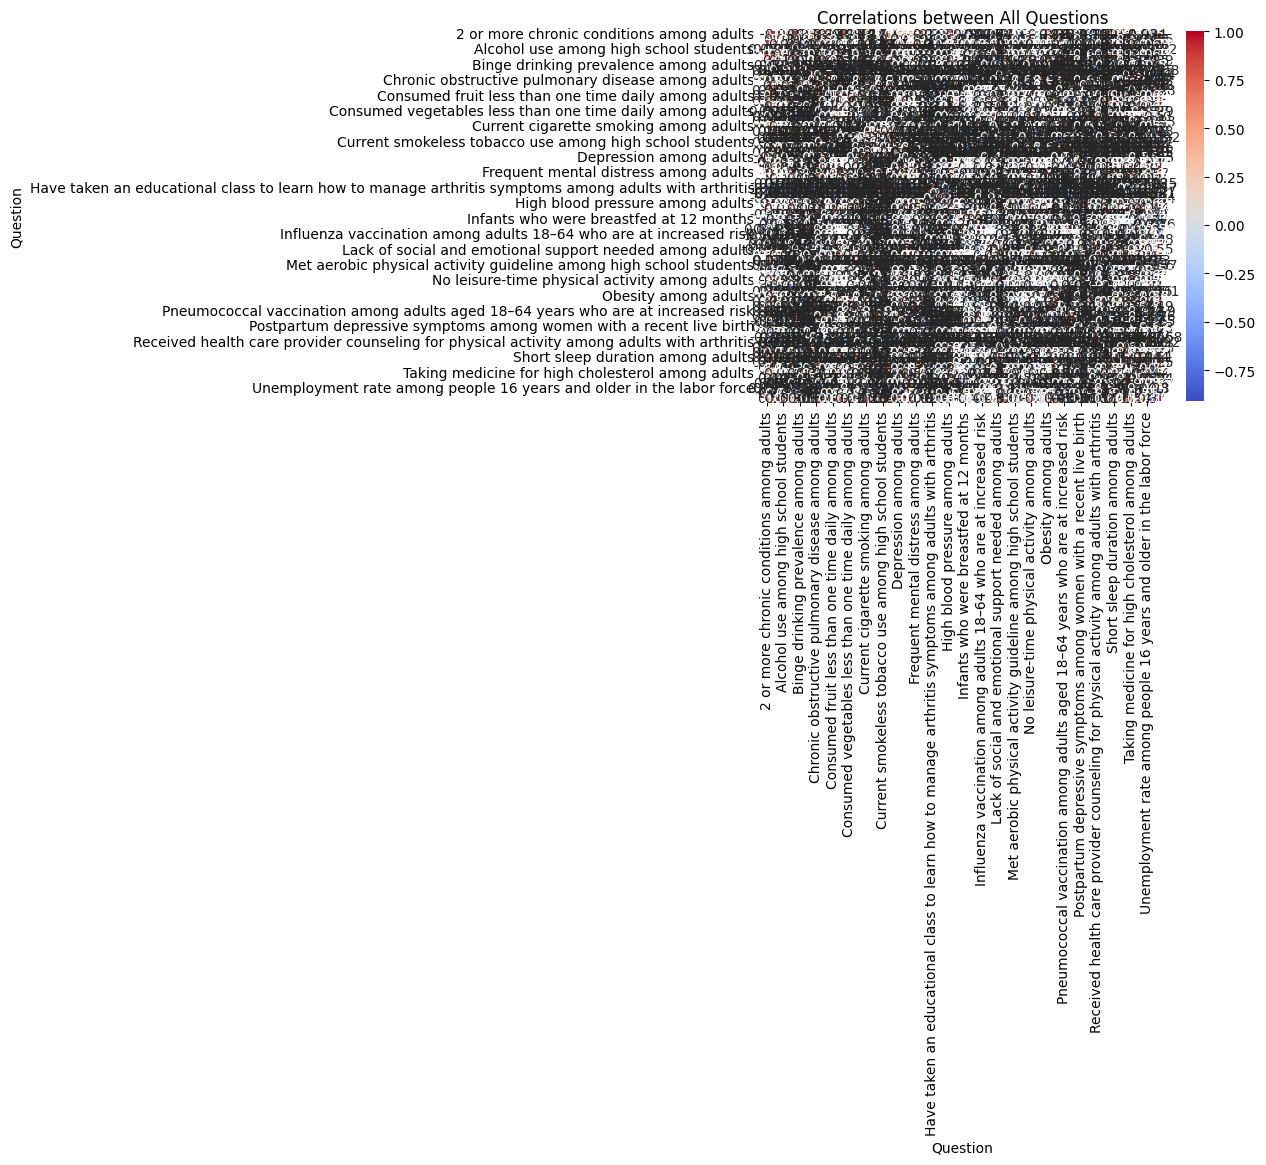

2 or more chronic conditions among adults and Activity limitation due to arthritis among adults with arthritis: 0.94
2 or more chronic conditions among adults and Arthritis among adults: 0.94
2 or more chronic conditions among adults and Chronic obstructive pulmonary disease among adults: 0.95
2 or more chronic conditions among adults and High blood pressure among adults: 0.87
Activity limitation due to arthritis among adults with arthritis and 2 or more chronic conditions among adults: 0.94
Activity limitation due to arthritis among adults with arthritis and Arthritis among adults: 0.94
Activity limitation due to arthritis among adults with arthritis and Chronic obstructive pulmonary disease among adults: 0.92
Activity limitation due to arthritis among adults with arthritis and Frequent mental distress among adults: 0.84
Adults with any disability and Consumed regular soda at least one time daily among high school students: 0.81
Adults with any disability and Diabetes among adults: 0.

In [ ]:
# Run a correlation analysis of all the questions with each other (comparing DataValue)
correlations_df = df.pivot_table(index='LocationDesc', columns='Question', values='DataValue').corr()


threshold = 0.8
for q1 in correlations_df.columns:
    for q2 in correlations_df.columns:
        if q1 != q2:
            corr_val = correlations_df.loc[q1, q2]
            if corr_val > threshold:
                print(f"{q1} and {q2}: {corr_val:.2f}")

